# PointNet Implementation

## Data Transformation: STL to Point Clouds

In [1]:
from src.STLToPointClouds.StlToPointClouds import AeroDynamicsPointCloudDataset, STLToPointCloudConverter

In [2]:
def test_pointcloud_conversion():
    """Test point cloud conversion on sample vehicles"""
    print("Testing STL → Point Cloud conversion...")
    
    # Test with small dataset
    dataset = AeroDynamicsPointCloudDataset(subset_size=2, num_points=2048)
    
    print(f"\nTesting {len(dataset)} vehicles:")
    
    for i in range(len(dataset)):
        point_cloud, drag_coeff = dataset[i]
        
        print(f"\nVehicle {i+1}:")
        print(f"  Point cloud shape: {point_cloud.shape}")  # Should be (6, 1024)
        print(f"  Drag coefficient: {drag_coeff:.4f}")
        
        # Check data ranges
        points = point_cloud[:3, :].numpy()  # xyz coordinates
        normals = point_cloud[3:, :].numpy()  # surface normals
        
        print(f"  Points range: X[{points[0].min():.2f}, {points[0].max():.2f}], "
              f"Y[{points[1].min():.2f}, {points[1].max():.2f}], "
              f"Z[{points[2].min():.2f}, {points[2].max():.2f}]")
        
        print(f"  Normals range: [{normals.min():.2f}, {normals.max():.2f}]")
        
        # Visualize first vehicle
        if i == 0:
            converter = STLToPointCloudConverter(num_points=1024)
            # Transpose back for visualization: (1024, 6)
            converter.visualize_pointcloud(point_cloud.T.numpy(), 
                                         f"Vehicle {i+1} (Cd={drag_coeff:.4f})")


# def analyze_pointcloud_dataset():
#     """Analyze point cloud conversion across all vehicles"""
#     print("Analyzing point cloud conversion across all 484 vehicles...")
    
#     dataset = AeroDynamicsPointCloudDataset(num_points=2048)
    
#     successful_conversions = 0
#     failed_conversions = 0
#     point_ranges = []
    
#     for i in range(len(dataset)):
#         point_cloud, drag_coeff = dataset[i]
        
#         # Check if conversion was successful (not all zeros)
#         if point_cloud.sum() == 0:
#             failed_conversions += 1
#         else:
#             successful_conversions += 1
            
#             # Collect point coordinate ranges
#             points = point_cloud[:3, :].numpy()
#             ranges = {
#                 'x_range': points[0].max() - points[0].min(),
#                 'y_range': points[1].max() - points[1].min(), 
#                 'z_range': points[2].max() - points[2].min()
#             }
#             point_ranges.append(ranges)
        
#         if i % 50 == 0:
#             print(f"Processed {i+1}/{len(dataset)} vehicles...")
    
#     print(f"\nPoint Cloud Analysis:")
#     print(f"  Successful conversions: {successful_conversions}/{len(dataset)}")
#     print(f"  Failed conversions: {failed_conversions}")
    
#     if point_ranges:
#         ranges_df = pd.DataFrame(point_ranges)
#         print(f"  Vehicle size statistics:")
#         print(f"    X range: {ranges_df['x_range'].mean():.2f} ± {ranges_df['x_range'].std():.2f}")
#         print(f"    Y range: {ranges_df['y_range'].mean():.2f} ± {ranges_df['y_range'].std():.2f}")
#         print(f"    Z range: {ranges_df['z_range'].mean():.2f} ± {ranges_df['z_range'].std():.2f}")


# def compare_pointcloud_vs_voxels():
#     """Compare point cloud vs voxel representations"""
#     print("Comparing Point Cloud vs Voxel representations...")
    
#     # Load same vehicle with both methods
#     from src.Voxelization.voxelize import STLToVoxelConverter
    
#     stl_path = "data/drivaerml_data/run_1/drivaer_1.stl"
    
#     # Point cloud conversion
#     pc_converter = STLToPointCloudConverter(num_points=2048)
#     point_cloud, pc_success = pc_converter.convert_stl_to_pointcloud(stl_path)
    
#     # Voxel conversion
#     voxel_converter = STLToVoxelConverter(grid_size=32)
#     voxels, voxel_success = voxel_converter.convert_stl_to_voxels(stl_path)
    
#     print(f"\nComparison for drivaer_1.stl:")
#     print(f"  Point cloud: {point_cloud.shape} = {point_cloud.size} values")
#     print(f"  Voxels: {voxels.shape} = {voxels.size} values")
#     print(f"  Compression ratio: {voxels.size / point_cloud.size:.1f}x")
    
#     print(f"\nData characteristics:")
#     print(f"  Point cloud non-zero: {np.count_nonzero(point_cloud)} / {point_cloud.size}")
#     print(f"  Voxels non-zero: {np.count_nonzero(voxels)} / {voxels.size}")
    
#     # Visualize both
#     if pc_success:
#         pc_converter.visualize_pointcloud(point_cloud, "Point Cloud Representation")
    
#     if voxel_success:
#         voxel_converter.visualize_voxels(voxels, "Voxel Representation")



Testing STL → Point Cloud conversion...
Dataset loaded: 2 vehicles
Point cloud size: 2048 points × 6 features (xyz + normals)

Testing 2 vehicles:

Vehicle 1:
  Point cloud shape: torch.Size([6, 2048])
  Drag coefficient: 0.3035
  Points range: X[0.58, 1.65], Y[-0.77, 0.77], Z[0.67, 1.16]
  Normals range: [-0.98, 0.99]


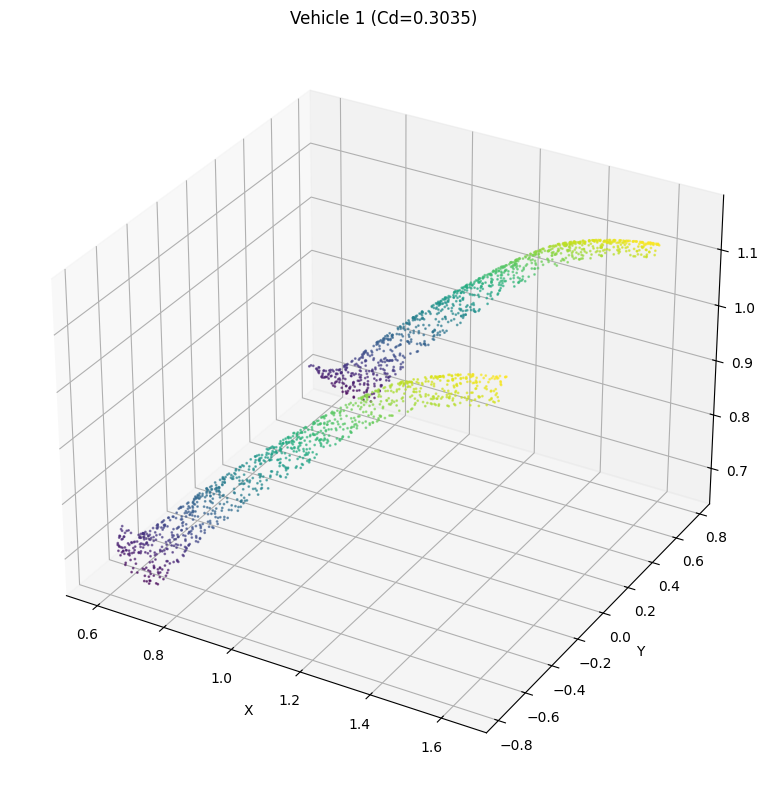


Vehicle 2:
  Point cloud shape: torch.Size([6, 2048])
  Drag coefficient: 0.2812
  Points range: X[0.57, 1.47], Y[-0.84, 0.84], Z[0.56, 1.01]
  Normals range: [-0.91, 1.00]


In [3]:
test_pointcloud_conversion()